With scikit-image

In [1]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
# from scipy.stats import signaltonoise
# from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

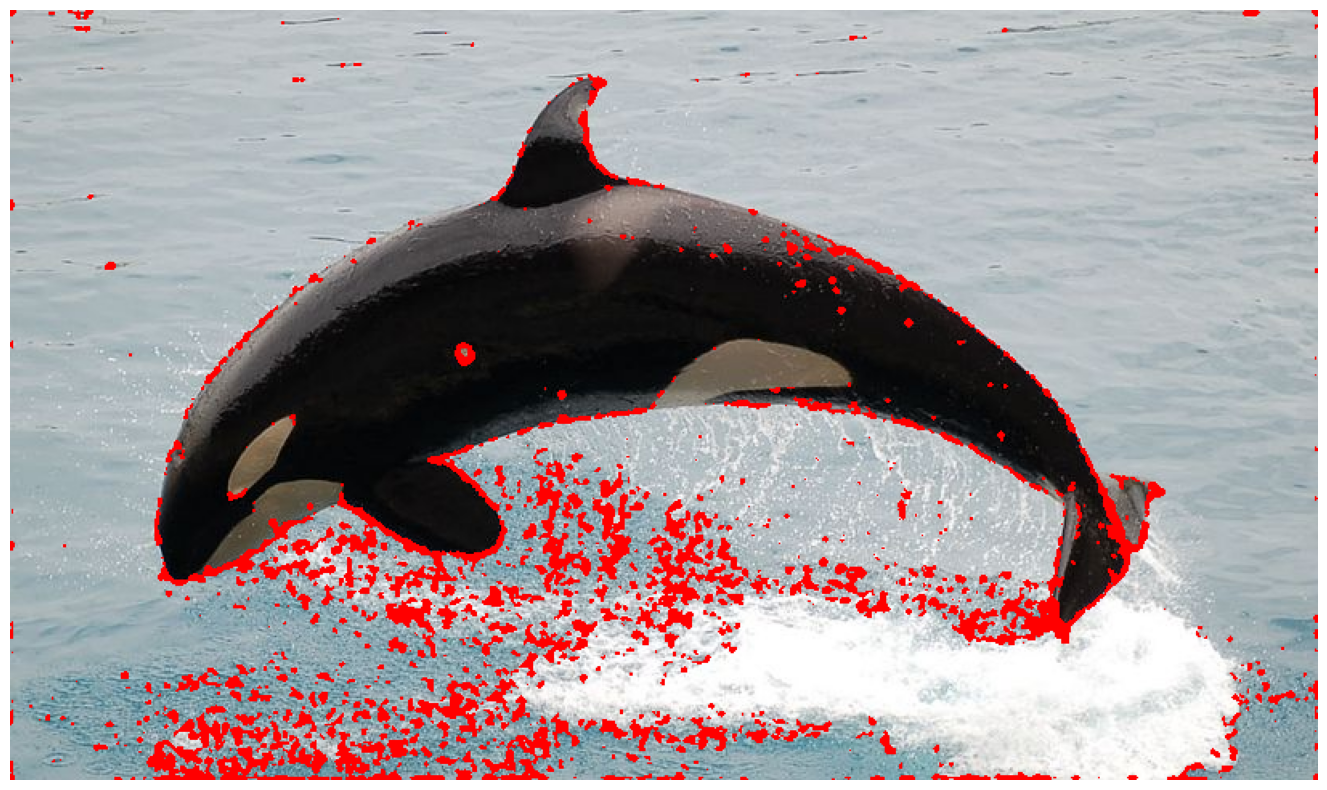

(<matplotlib.image.AxesImage at 0x751fc5372830>,
 (np.float64(-0.5), np.float64(814.5), np.float64(479.5), np.float64(-0.5)),
 None)

In [6]:
from skimage.feature import corner_harris
from skimage.color import rgb2gray
from skimage.io import imread
import pylab

# Đọc ảnh RGBA
image = imread('./images/whale.jpg')  # RGB hoặc RGBA image

# Loại bỏ kênh alpha nếu tồn tại
if image.shape[-1] == 4:  # Kiểm tra nếu ảnh có 4 kênh
    image = image[..., :3]  # Giữ lại 3 kênh đầu (RGB)

# Chuyển đổi sang grayscale
image_gray = rgb2gray(image)

# Áp dụng Harris Corner Detector
coordinates = corner_harris(image_gray, k=0.001)

# Đánh dấu góc phát hiện được bằng màu đỏ
image[coordinates > 0.01 * coordinates.max()] = [255, 0, 0]

# Hiển thị ảnh
pylab.figure(figsize=(20, 10))
pylab.imshow(image), pylab.axis('off'), pylab.show()


Determinant of Hessian (DoH)

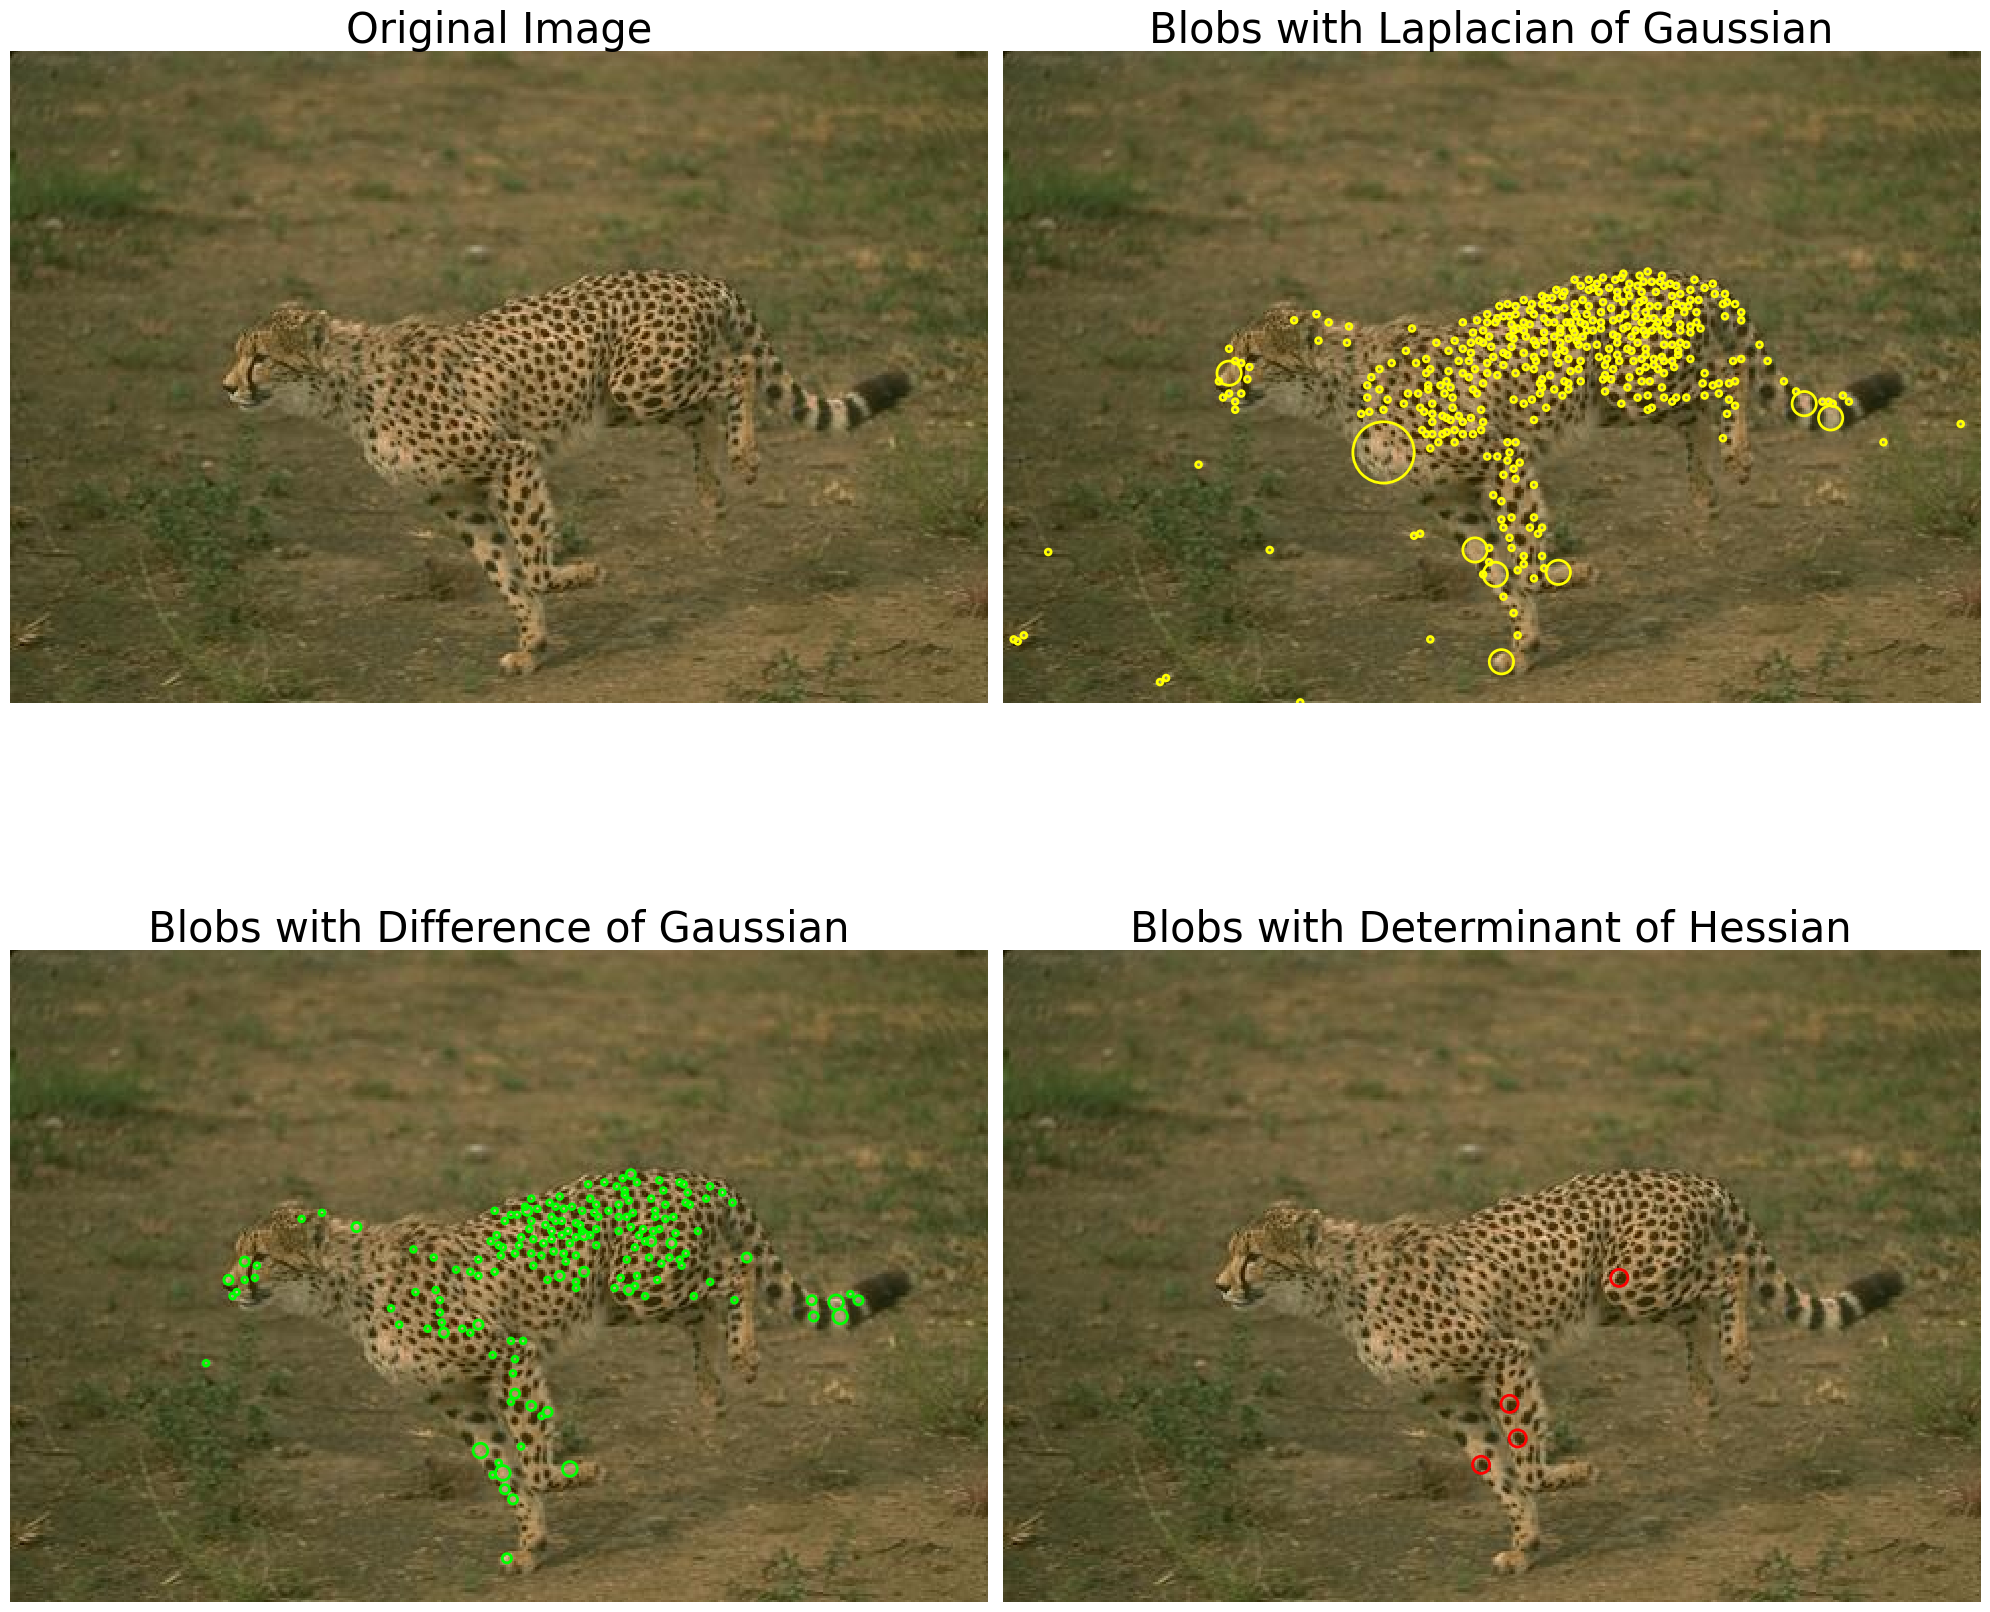

(None, None)

In [11]:
from matplotlib import colors
from numpy import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pyplot as plt
import pylab

# Đọc ảnh
im = imread('./images/cheetah.png')

# Loại bỏ kênh Alpha nếu có
if im.shape[-1] == 4:  # Kiểm tra nếu ảnh có 4 kênh
    im = im[..., :3]   # Lấy ba kênh đầu (RGB)

# Chuyển sang ảnh xám
im_gray = rgb2gray(im)

# Phát hiện blob
log_blobs = blob_log(im_gray, max_sigma=30, num_sigma=10, threshold=.1)
log_blobs[:, 2] = sqrt(2) * log_blobs[:, 2]  # Tính bán kính trong cột thứ 3
dog_blobs = blob_dog(im_gray, max_sigma=30, threshold=0.1)
dog_blobs[:, 2] = sqrt(2) * dog_blobs[:, 2]
doh_blobs = blob_doh(im_gray, max_sigma=30, threshold=0.005)

list_blobs = [log_blobs, dog_blobs, doh_blobs]
colors, titles = ['yellow', 'lime', 'red'], ['Laplacian of Gaussian',
                                            'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(list_blobs, colors, titles)

# Hiển thị kết quả
fig, axes = pylab.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.ravel()
axes[0].imshow(im, interpolation='nearest')
axes[0].set_title('Original Image', size=30), axes[0].set_axis_off()

for idx, (blobs, color, title) in enumerate(sequence):
    axes[idx + 1].imshow(im, interpolation='nearest')
    axes[idx + 1].set_title('Blobs with ' + title, size=30)
    for blob in blobs:
        y, x, r = blob
        circle = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        axes[idx + 1].add_patch(circle), axes[idx + 1].set_axis_off()

pylab.tight_layout(), pylab.show()


Compute HOG descriptors with scikit-image

(720, 534) 11880


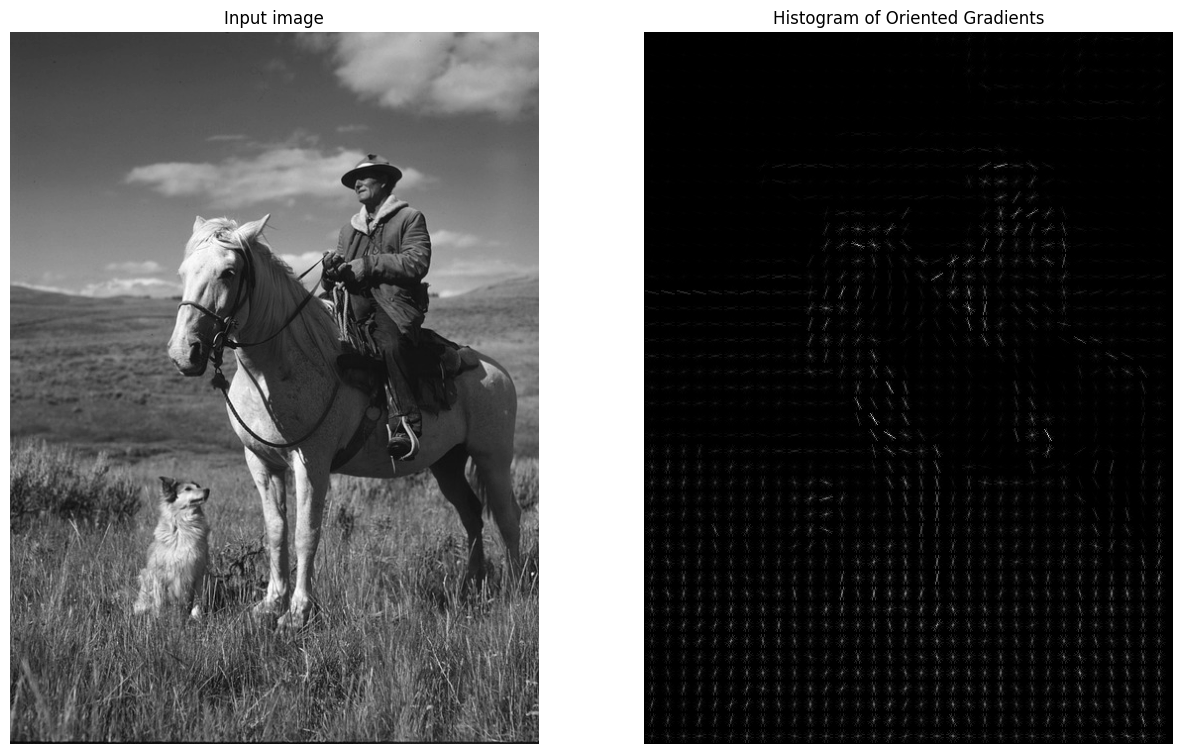

In [15]:
from skimage.feature import hog
from skimage import exposure
image = rgb2gray(imread('./images/man.jpg'))
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
cells_per_block=(1, 1), visualize=True)
print(image.shape, len(fd))
# ((256L, 256L), 2048)
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10), sharex=True,
sharey=True)
axes1.axis('off'), axes1.imshow(image, cmap=pylab.cm.gray),
axes1.set_title('Input image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
axes2.axis('off'), axes2.imshow(hog_image_rescaled, cmap=pylab.cm.gray),
axes2.set_title('Histogram of Oriented Gradients')
pylab.show()